# Avances primera semana: Usando datos de Pantheon

Se usan datos de: lcparam_full_long.txt


In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de constantes

c = 299792 #km/s

M = -19.3 

H_0 = 70

In [143]:

# Extracción de datos

columna2 = [] #z_cmb
columna4 = [] #m_b
columna5 = [] #desv_m

with open('c:/Users/ximen/Desktop/Practicas DFI/lcparam_full_long.txt', 'r') as archivo:
    for linea in archivo:
        elementos = linea.split()

        columna2.append(elementos[1])
        columna4.append(elementos[4])
        columna5.append(elementos[5])

#print("z_cmb:", columna2)
#print("m_b:", columna4)
#print('desv_m:', columna5)

z_cmb = np.zeros(len(columna2))
for i in range(1,len(columna2)): #ya que el elemento 0 es un string
  z_cmb[i] = float(columna2[i])

m_b = np.zeros(len(columna4))
for i in range(1,len(columna4)):
  m_b[i] = float(columna4[i])

desv_m = np.zeros(len(columna5))
for i in range(1,len(columna5)):
  desv_m[i] = float(columna5[i])

# Se quitan los elementos 0 de cada lista porque son = 0 
z_cmb = z_cmb[1:]
m_b = m_b[1:]
desv_m = desv_m[1:]

# Se ordenan elementos

indices_ordenados = np.argsort(z_cmb)

z_cmb_ordenado = z_cmb[indices_ordenados]
m_b_ordenado = m_b[indices_ordenados]
desv_m_ordenado = desv_m[indices_ordenados]

## Distancia de Luminosidad: $D_L (z)$

En este caso solo se tenían las luminosidades aparentes, es decir, $m_b$, por lo que para calcular $D_L$ se usó la relación: 

$$m - M = 5log(D_L / Mpc) + 25$$

Se tomó la luminosidad absoluta de todas las supernova tipo Ia como una cantidad conocida e igual a $M = -19.3$. Por lo tanto: 

$$\frac{D_L}{Mpc} = 10^{(m - M - 25) / 5}$$

Para calcular el error asociado a las medidas de $D_L$ usamos la fórmula general de propagación de errores: 

$$\delta D_L = 2^{(m_b-M-25)/5}\cdot 5^{((m_b-M-25)/5 -1)} \cdot log(10) \cdot \delta m$$

Polinomio ajustado:       2
1105 x + 5363 x - 117.7


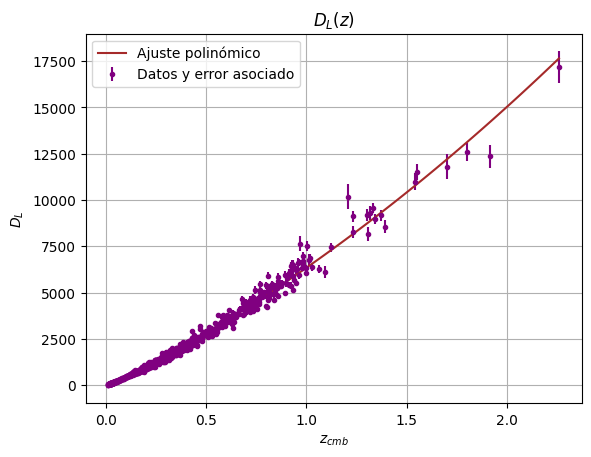

In [165]:
# calculo de D_L

D_L = 10**((m_b_ordenado - 25 - M)/5) # En Mpc
desv_L = 2**((m_b_ordenado-M-25)/5)*5**((m_b_ordenado-M-25)/5 -1)*np.log10(10)*desv_m_ordenado


# Ajuste Lineal con función np.polyfit

coeficientes = np.polyfit(z_cmb_ordenado, D_L, 2)

polinomio = np.poly1d(coeficientes)

print("Polinomio ajustado:", polinomio)

z_ajuste = np.linspace(min(z_cmb_ordenado), max(z_cmb_ordenado), 100)
D_ajuste = polinomio(z_ajuste)


# Visualiza los datos y la curva ajustada
plt.errorbar(z_cmb_ordenado, D_L, yerr=desv_L, label='Datos y error asociado',fmt='.', color = 'purple')
plt.plot(z_ajuste, D_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z_{cmb}$')
plt.ylabel('$D_L$')
plt.legend()
plt.title('$D_L(z)$')
plt.grid(True)
plt.show()

## Cálculo de $D_A$ a partir de $D_L$

$$d_A = \frac{d_L}{(1+z)^2}$$

Tenemos gráficos en bibliografía que pueden ser comparados con este. En tales se grafica $(H_0/c)d_A$ v/s $z$. 

Text(0.5, 1.0, 'Diametral Angular Distance v/s z')

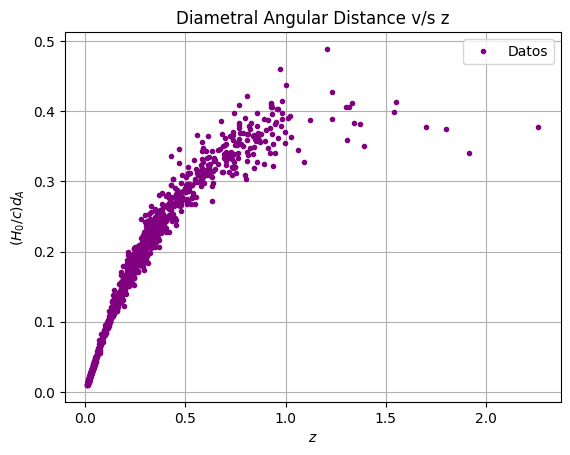

In [166]:
D_A = D_L / ((1+z_cmb_ordenado)**2)

plt.plot(z_cmb_ordenado, (H_0/c)*D_A, '.', label = 'Datos', color = 'purple')
plt.xlabel('$z$')
plt.ylabel('$(H_0/c)d_A$')
plt.legend()
plt.grid(True)
plt.title('Diametral Angular Distance v/s z')

## Módulo de distancia $(\mu)$

Se calcula a través de la relación $\mu = 5 \cdot log(D_L / 10 pc)$

*Observaciones:*

1. El grafico no luce como el presentado en la bibliografía
2. La barras de error no se aprecian con facilidad (el error se calculó con la fórmula general de propagación de errores)
3. No se puede ajustar un polinomio adecuadamente

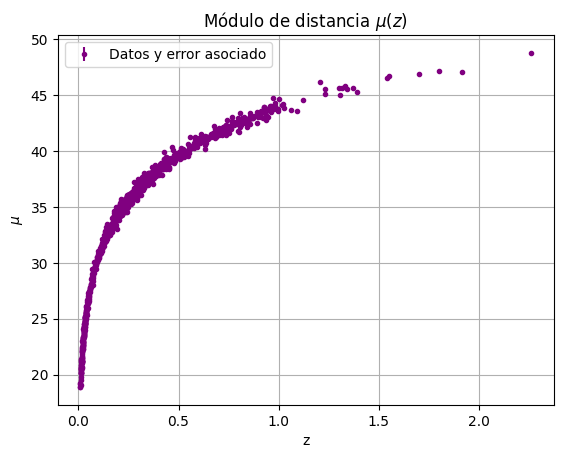

In [167]:
mu = 5*np.log(D_L)

desv_mu = (5/(D_L * np.log(10))) * desv_L

plt.errorbar(z_cmb_ordenado, mu, yerr=desv_mu, label='Datos y error asociado',fmt='.', color = 'purple')
plt.xlabel('z')
plt.ylabel('$\mu$')
plt.title('Módulo de distancia $\mu(z)$')
plt.legend()
plt.grid(True)
plt.show()

## Magnitud aparente: $m_b(z)$

Aquí se graficó directamente $m_b$ con respecto a $z$ para comparar la forma de la función con otras fuentes. 

El ajuste lineal no entrega ningún polinomio que pueda fitearse bien a los datos. 

Polinomio ajustado:       2
1105 x + 5363 x - 117.7


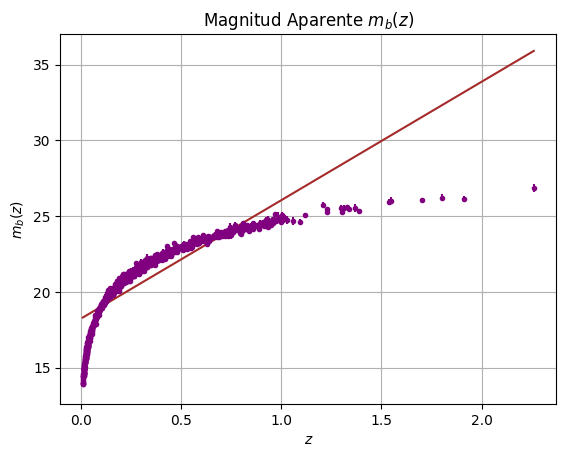

In [168]:
#m_b

# Ajuste Lineal

coeficientes_m = np.polyfit(z_cmb_ordenado, m_b_ordenado, 1)

polinomio_m = np.poly1d(coeficientes_m)

print("Polinomio ajustado:", polinomio)

# Genera puntos para la curva ajustada
z_ajuste_m = np.linspace(min(z_cmb_ordenado), max(z_cmb_ordenado), 100)
m_ajuste = polinomio_m(z_ajuste_m)


plt.errorbar(z_cmb_ordenado, m_b_ordenado, yerr=desv_m, fmt='.', label='Error asociado', color = 'purple')
plt.plot(z_ajuste_m, m_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$m_b(z)$')
plt.grid(True)
plt.title('Magnitud Aparente $m_b(z)$')
plt.show()

## $H(z)$ a partir de la relación: $$H(z) = c(\frac{d}{dz}\frac{D_L(z)}{1+z})^{-1}$$

Con esto llegamos a un gráfico de $H(z)$. Lo intenté hacer de dos formas: 

1. Calculando la derivada centrada. 
2. Usando *np.gradient* para calcular la derivada. 

Ambas me dieron resultados similares pero que no coinciden con la apariencia general de $H(z)$ que, según los resultados de los datos anteriores y de otros trabajos, debería ser alguna curva creciente. 

Text(0.5, 1.0, '$H(z)$ calculado a partir de $D_L$ con np.gradient')

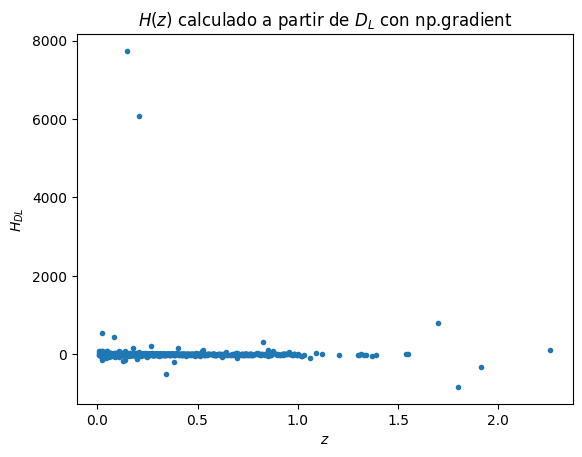

In [169]:
derivative = np.gradient(D_L / (1 + z_cmb_ordenado), z_cmb_ordenado)
H_DL = c*(1/derivative)

plt.plot(z_cmb_ordenado, H_DL, '.')
plt.ylabel('$H_{DL}$')
plt.xlabel('$z$')
plt.title('$H(z)$ calculado a partir de $D_L$ con np.gradient')

# Progreso semana 2

**Objetivo:** Encontrar funciones teóricas para $H(z)$, $D_L(z)$ y $D_A(z)$, y empezar con algoritmo genético. 

In [170]:
def integral_acumulativa(x, y):
    integral = np.zeros_like(y)
    for i in range(1, len(y)):
        integral[i] = np.trapz(y[:i+1], x[:i+1])
    return integral

In [171]:
H_0 = 70
O_r = 8.4*10**(-5)
O_m = 0.3
O_lambda = 0.7
o_DE = -1
O_0 = 0.8

# Se crea un arreglo de z para la función teórica
z_bu = np.linspace(0, 2.5, 100)

## $D_L$ teórico

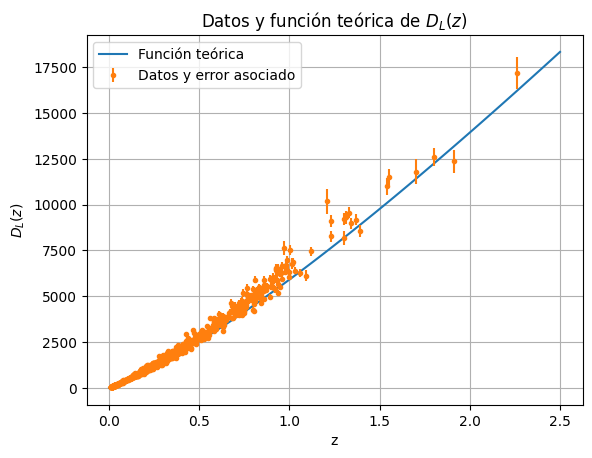

In [172]:
def DL_bm(z_bu, Omega_r, Omega_m, Omega_lambda, omega_DE, Omega_0): 
    return (c*(1+z_bu)/H_0) * integral_acumulativa(z_bu, 1/np.sqrt((Omega_r*(1+z_bu)**(3*(1 + 1/3)) + Omega_m*(1+z_bu)**3 + Omega_lambda*(1+z_bu)**(3*(1+omega_DE)) + (1-Omega_0)*(1+z_bu)**2)))

plt.plot(z_bu, DL_bm(z_bu,O_r, O_m, O_lambda, o_DE, O_0), label = 'Función teórica')
plt.errorbar(z_cmb_ordenado, D_L, yerr=desv_L, fmt='.', label='Datos y error asociado')
plt.grid(True)
plt.title('Datos y función teórica de $D_L(z)$')
plt.xlabel('z')
plt.ylabel('$D_L(z)$')
plt.legend()
plt.show()

## $D_A$ teórico

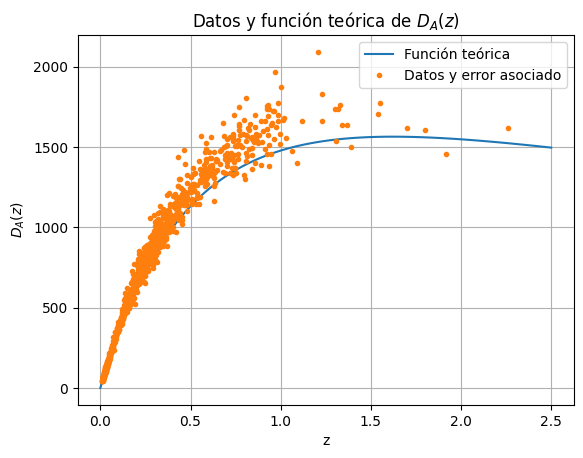

In [173]:
DA_bm = DL_bm(z_bu,O_r, O_m, O_lambda, o_DE, O_0)/((1+z_bu)**2)

plt.plot(z_bu, DA_bm, label = 'Función teórica')
plt.errorbar(z_cmb_ordenado, D_A, fmt='.', label='Datos y error asociado')
plt.grid(True)
plt.title('Datos y función teórica de $D_A(z)$')
plt.xlabel('z')
plt.ylabel('$D_A(z)$')
plt.legend()
plt.show()

## $H(z)$ teórico

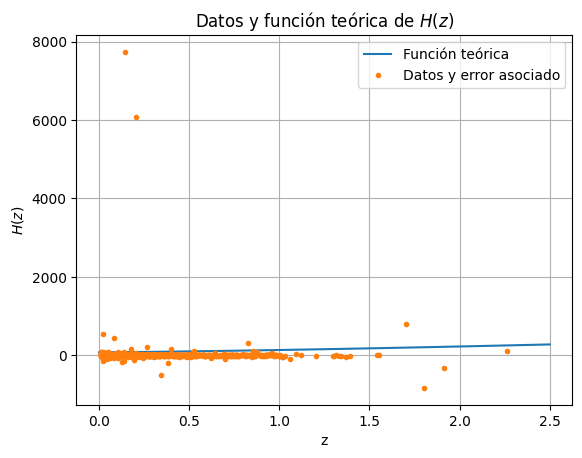

In [174]:
def H_bm(z, Omega_r, Omega_m, Omega_lambda, omega_DE, Omega_0): 
    return H_0*np.sqrt((Omega_r*(1+z)**(3*(1 + 1/3)) + Omega_m*(1+z)**3 + Omega_lambda*(1+z)**(3*(1+omega_DE)) + (1-Omega_0)*(1+z)**2))

H_teorico = H_bm(z_bu,O_r, O_m, O_lambda, o_DE, O_0)

plt.plot(z_bu, H_teorico, label = 'Función teórica')
plt.errorbar(z_cmb_ordenado, H_DL, fmt='.', label='Datos y error asociado')
plt.grid(True)
plt.title('Datos y función teórica de $H(z)$')
plt.xlabel('z')
plt.ylabel('$H(z)$')
plt.legend()
plt.show()